In [1]:
import numpy as np
import pandas as pd
import rdkit.Chem as ch
import rdkit.Chem as Chem
from rdkit.Chem import Descriptors
import numpy as np
import sys
import rdkit.Chem.Crippen as Crippen
import rdkit.Chem.rdMolDescriptors as MolDescriptors
from rdkit.Chem import Descriptors

RDKit WARNING: [14:36:24] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
sys.path.insert(0,'./Modules/')
from rewards import bunch_evaluation

In [ ]:
decode(output,decodings)

In [4]:
df = pd.read_excel('./Generated molecules/AKT_trial.xlsx')

In [5]:
df.head()

,Smiles,pChEMBL_Value
0,Cc1nc(NC(=O)N2CC[C@H](O)[C@H]2C(N)=O)sc1-c1csc...,6.75
1,CCCN(C)Cc1ccc(-c2nnc3n2-c2cccnc2Nc2ccccc2-3)cc1,5.60
2,Cc1nc(N)nc(-c2c(Nc3cc[nH]n3)nc3ccc(-c4cccc(F)c...,7.14
3,CNS(=O)(=O)c1ccc(C(=O)N2CCOc3ccc(-c4ccc5nc[nH]...,6.09
4,NC[C@@H](Cc1ccccc1)NC(=O)c1cc(Br)c(-c2ccnc3[nH...,5.22


In [6]:
img = (ch.MolFromSmiles(df.iloc[1,0]))
mol2 = ch.MolFromSmiles(df.iloc[1,1])

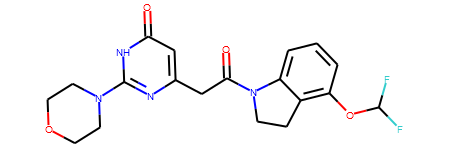

In [7]:
img

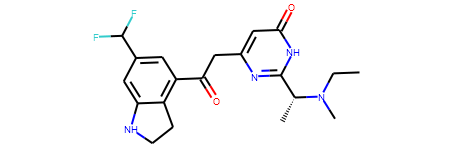

In [8]:
mol2

In [9]:
mol = []
for smile in df['Initial']:
    mol.append(ch.MolFromSmiles(smile))

In [10]:
logP = []
mw = []
tpsa = []
ss = []
for molecule in mol:
    logP.append(Crippen.MolLogP(molecule))
    mw.append(MolDescriptors.CalcExactMolWt(molecule))
    tpsa.append(Descriptors.TPSA(molecule))
df['logP'] = np.asarray(logP)
df['MW'] = np.asarray(mw)
df['tPSA'] = np.asarray(tpsa)
df['SweetSpot'] = ((3<df['logP']) & (df['logP']<5)& (320<df['MW']) & (df['MW']<420) & (80<df['tPSA']) & (df['tPSA']<110))
df['SweetSpot'].describe()

count       316
unique        1
top       False
freq        316
Name: SweetSpot, dtype: object

In [11]:
mol = []
for smile in df[' Modified']:
    mol.append(ch.MolFromSmiles(smile))
logP = []
mw = []
tpsa = []
ss = []
for molecule in mol:
    logP.append(Crippen.MolLogP(molecule))
    mw.append(MolDescriptors.CalcExactMolWt(molecule))
    tpsa.append(Descriptors.TPSA(molecule))
df['logP'] = np.asarray(logP)
df['MW'] = np.asarray(mw)
df['tPSA'] = np.asarray(tpsa)
df['SweetSpot'] = ((3<df['logP']) & (df['logP']<5)& (320<df['MW']) & (df['MW']<420) & (80<df['tPSA']) & (df['tPSA']<110))
df['SweetSpot'].describe()

count       316
unique        2
top       False
freq        302
Name: SweetSpot, dtype: object

In [12]:
new_df = df.loc[df.SweetSpot==True]

In [19]:
mol1 = (ch.MolFromSmiles(new_df.iloc[1,0]))
mol2 = ch.MolFromSmiles(new_df.iloc[1,1])

In [14]:
print(img)

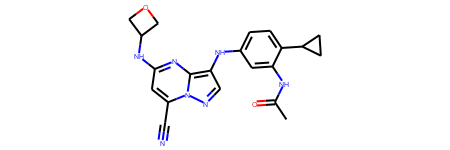

In [18]:
img

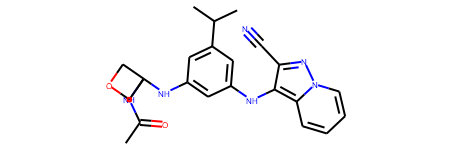

In [20]:
mol2

In [3]:
import sys
sys.path.insert(0, './Modules/')

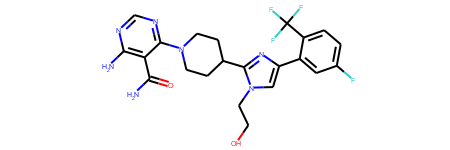

In [3]:
import rewards
import pandas as pd
import rdkit.Chem as ch
df = pd.read_csv('./out153.csv',engine="python")
mol = ch.MolFromSmiles(df.iloc[0,0])
mol

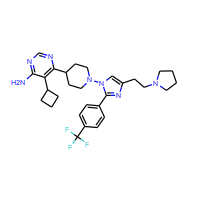

In [5]:
from rdkit.Chem import Draw
ch.Draw.MolsToImage([mol], subImgSize=(200, 200))

In [4]:
df.head()

,Initial molecule,Modified molecule
0,NC(=O)c1c(N)ncnc1N1CCC(c2nc(-c3cc(F)ccc3C(F)(F...,CC(=O)Nc1c(N)ncnc1N1C[C@H]2C[C@@]2(c2nc(-c3nc...
1,CCc1c(N)ncnc1N1CCC(c2nc(-c3cc(F)ccc3Cl)cn2CCN2...,CCCCCCOn1nc(N)nc1N1CCCC(c2cc(-c3nc(F)cn3Cl)cc...
2,Cc1ccc(-c2c(N)ncnc2N2CCC(c3nc(-c4cc(F)ccc4C(F)...,Cc1ccc(-c2c(N)ncnc2N2C[C@H]3C[C@@]3(c3nc(-c4c...
3,CCN(CC)c1nccc(-c2sc(C(=O)N[C@H]3CCCN3C(N)=O)nc...,NCc1c(-c2nc(NCCCCO)ncc2)cc(C(=O)N[C@H]2CCCN2C...
4,CCOc1ccc(Nc2nc3ccccn3c2-c2nc(C)nc(N)n2)cn1,CCOc1ccc(Nc2c(-c3nc(C#N)nc(I)n3)n3ccccc3n2)cn1


In [5]:
from rewards import bunch_evaluation
moli = []
molm = []
for i in range(len(df)):
    moli.append(ch.MolFromSmiles(df.iloc[i,0]))
    molm.append(ch.MolFromSmiles(df.iloc[i,1]))

In [6]:
ini = bunch_evaluation(moli)
mod = bunch_evaluation(molm)

Properties predicted for 305 molecules
 Evaluations completed
Properties predicted for 305 molecules
 Evaluations completed


In [27]:
ini = np.asarray(ini)
mod = np.asarray(mod)

In [ ]:
#remember to change pIC50 conversion depending on the reward function

In [28]:
changes = pd.DataFrame(data=np.transpose(np.asarray([(mod[:,1]*3+7),(ini[:,1]*3 +7)])),columns=['Modified','Initial']) 

In [29]:
changes.head()

,Modified,Initial
0,6.839906,7.133250
1,7.661039,8.094989
2,6.992800,6.307453
3,6.822444,7.555533
4,7.056073,7.114760


In [31]:
changes['Delta'] = changes['Modified'] - changes['Initial']
changes.sort_values(by='Delta',ascending=False,inplace=True)

In [57]:
inact_to_act = changes.loc[(changes['Modified']>7) & (changes['Initial']<7),['Modified','Initial','Delta']].sort_values(by='Delta',ascending=False)

In [43]:
changes.head(10)

,Modified,Initial,Delta
61,6.266838,3.624936,2.641902
168,6.746200,4.602422,2.143778
50,6.433924,4.540926,1.892998
122,6.191000,4.602422,1.588578
21,5.850533,4.561467,1.289067
84,6.393654,5.201288,1.192366
207,7.537467,6.352000,1.185467
42,7.314333,6.138750,1.175583
68,7.505867,6.352000,1.153867
210,8.129183,7.102867,1.026317


In [44]:
changes.to_csv('./out153_pIC.csv',index=False)

In [60]:
inact_to_act.to_csv('./act_pIC153.csv',index=False)

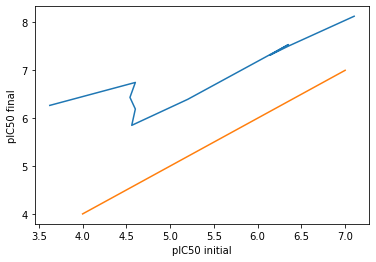

In [73]:
import matplotlib.pyplot as plt
x = [4,5,6,7]
y = x
plt.xlabel('pIC50 initial')
plt.ylabel('pIC50 final')
plt.plot(changes['Initial'].iloc[0:10],changes['Modified'].iloc[0:10],x,y)

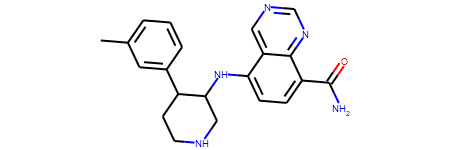

In [47]:
moli[207]

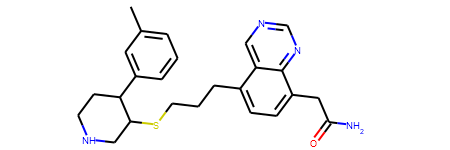

In [48]:
molm[207]

In [9]:
df = pd.read_csv('./Data/AKT_pchembl.csv')
mol = []
i = 1
for smile in df['Smiles']:
    if i>=6:
        break
    mol.append(ch.MolFromSmiles(smile))
    i += 1

In [70]:
changes.loc[changes['Delta']<0].sum()

Modified    1046.061382
Initial     1110.572553
Delta        -64.511171
dtype: float64

In [72]:
changes.loc[changes['Delta']>0].sum()

Modified    1007.102905
Initial      945.802042
Delta         61.300863
dtype: float64